In [1]:
import tensorflow as tf
import numpy as np
from tqdm import tqdm

In [2]:
N = 5000
n_iters = 1000
# The gaussians seem to keep moving!

In [3]:
g = lambda : tf.random_normal([N,], mean=0, stddev=1.0)
#cx = tf.complex(g(), g())
x = tf.complex(
    tf.Variable(tf.random_normal([N,])),
    tf.Variable(tf.random_normal([N,])),
)
               

In [4]:
#quadratic =  tf.complex(g(), tf.zeros(N,)) * x**2 + tf.complex(g(), tf.zeros(N,))
#quadratic =  1 * x**2 + 1 * tf.complex(tf.linspace(0.,1.,N), tf.zeros(N,))
quadratic =  1 * x**2 + 1 * tf.complex(tf.random_normal([N,]), tf.random_normal([N,]) )

term_error = tf.abs(quadratic)
loss = tf.reduce_sum(term_error)

In [5]:
opt = tf.train.AdamOptimizer(0.01)
#opt = tf.train.GradientDescentOptimizer(0.05)
train_op = opt.minimize(loss)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [6]:
result, sols = [], []
for n in tqdm(range(n_iters)):
    _, lx, x_val = sess.run([train_op, loss, x])
    result.append(lx)
    #sols.append(x_val)
   
#result = np.array(result)
#sols = np.array(sols)
lx, tx = sess.run([loss, term_error])
print(lx/N)
#print(tx)


100%|██████████| 1000/1000 [00:03<00:00, 259.17it/s]

1.24642919921875


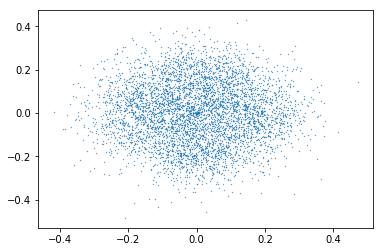

In [9]:
import pylab as plt
pts = sess.run(x)
plt.scatter(pts.real, pts.imag, s=0.1)

In [8]:

import pylab as plt
for row in tqdm(sols.T):
    alpha = np.linspace(0.5, 1, len(row))

    rgba_colors = np.zeros((len(row),4))
    rgba_colors[:,0] = 1.0
    rgba_colors[:, 3] = alpha

    plt.scatter(row.real, row.imag, color=rgba_colors, lw=0,s=.1)

plt.xlim(-2,2)
plt.ylim(-2,2)
plt.axis('square')
plt.tight_layout()
#plt.show()

AttributeError: 'list' object has no attribute 'T'